<a href="https://colab.research.google.com/github/PlasticxPlastic/project_linear_algreba/blob/main/the_beatles_recomendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler
import math

In [ ]:
import warnings
warnings.filterwarnings('ignore')

Import Data

In [ ]:
url = "https://raw.githubusercontent.com/PlasticxPlastic/project_linear_algreba/main/TheBeatlesCleaned.csv"
url2 = "https://raw.githubusercontent.com/PlasticxPlastic/project_linear_algreba/main/TheBeatlesRaw1.csv"
Tdata = pd.read_csv(url2)
dataset = pd.read_csv(url)
dataset.head()

,id,year,album,song,danceability,energy,speechiness,acousticness,liveness,valence,duration_ms
0,1,1963,Please Please Me,I Saw Her Standing There,0.491,0.801,0.0361,0.270,0.0665,0.971,173947
1,2,1963,Please Please Me,Misery,0.591,0.605,0.0413,0.707,0.3090,0.882,108547
2,3,1963,Please Please Me,Anna,0.608,0.565,0.0336,0.635,0.0601,0.835,177133
3,4,1963,Please Please Me,Chains,0.654,0.561,0.0304,0.608,0.1290,0.929,145080
4,5,1963,Please Please Me,Boys,0.402,0.860,0.0504,0.607,0.7360,0.822,146440


find shape of dataset which is 193 rows nad 11 columns

In [ ]:
dataset.shape

(193, 11)

Show data infomation

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            193 non-null    int64  
 1   year          193 non-null    int64  
 2   album         193 non-null    object 
 3   song          193 non-null    object 
 4   danceability  193 non-null    float64
 5   energy        193 non-null    float64
 6   speechiness   193 non-null    float64
 7   acousticness  193 non-null    float64
 8   liveness      193 non-null    float64
 9   valence       193 non-null    float64
 10  duration_ms   193 non-null    int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 16.7+ KB


In [ ]:
def cbname(dataset):
  dt = dataset.copy()
  for i in range(0,dataset.shape[0]):
    dt["cbname"] = dt["song"] +'     album : ' + dt["album"]
  return dt

In [ ]:
data = cbname(dataset)

In [ ]:
data.head()

,id,year,album,song,danceability,energy,speechiness,acousticness,liveness,valence,duration_ms,cbname
0,1,1963,Please Please Me,I Saw Her Standing There,0.491,0.801,0.0361,0.270,0.0665,0.971,173947,I Saw Her Standing There album : Please Pl...
1,2,1963,Please Please Me,Misery,0.591,0.605,0.0413,0.707,0.3090,0.882,108547,Misery album : Please Please Me
2,3,1963,Please Please Me,Anna,0.608,0.565,0.0336,0.635,0.0601,0.835,177133,Anna album : Please Please Me
3,4,1963,Please Please Me,Chains,0.654,0.561,0.0304,0.608,0.1290,0.929,145080,Chains album : Please Please Me
4,5,1963,Please Please Me,Boys,0.402,0.860,0.0504,0.607,0.7360,0.822,146440,Boys album : Please Please Me


In [ ]:
data.drop(columns = ["id"])
data["ids"]=[i for i in range(0,data.shape[0])]

Count how many value in data

In [ ]:
data.count()

id              193
year            193
album           193
song            193
danceability    193
energy          193
speechiness     193
acousticness    193
liveness        193
valence         193
duration_ms     193
cbname          193
ids             193
dtype: int64

In [ ]:
data.song

0       I Saw Her Standing There
1                         Misery
2                           Anna
3                         Chains
4                           Boys
                 ...            
188            ive got a feeling
189                one after 909
190    the long and winding road
191                 for you blue
192                     get back
Name: song, Length: 193, dtype: object

Check if there is some of data is missing 

In [ ]:
data.isnull().any() 

id              False
year            False
album           False
song            False
danceability    False
energy          False
speechiness     False
acousticness    False
liveness        False
valence         False
duration_ms     False
cbname          False
ids             False
dtype: bool

Danceability graph

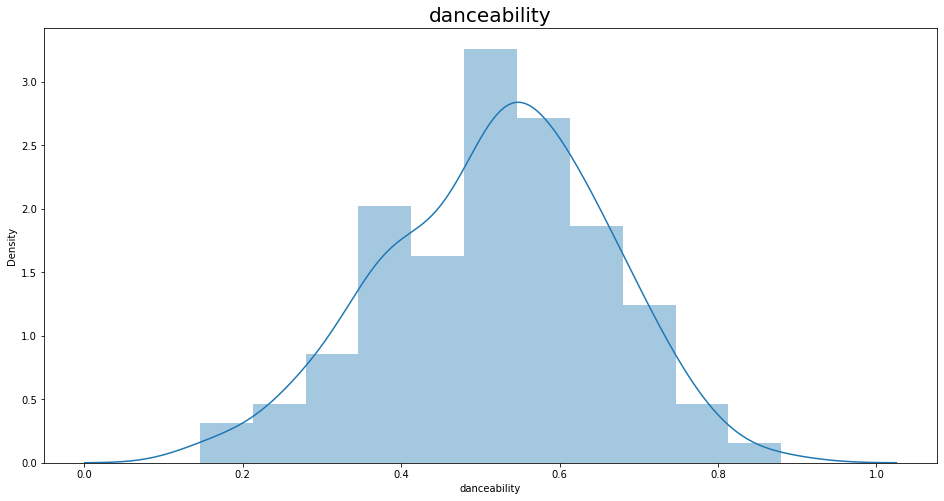

In [ ]:
plt.figure(figsize = (16, 8))                                                                                                           
plt.title('danceability',fontsize = 20)                                                                                                                     
sns.distplot(data['danceability'])                                                                                                                                   
plt.show()

energy graph

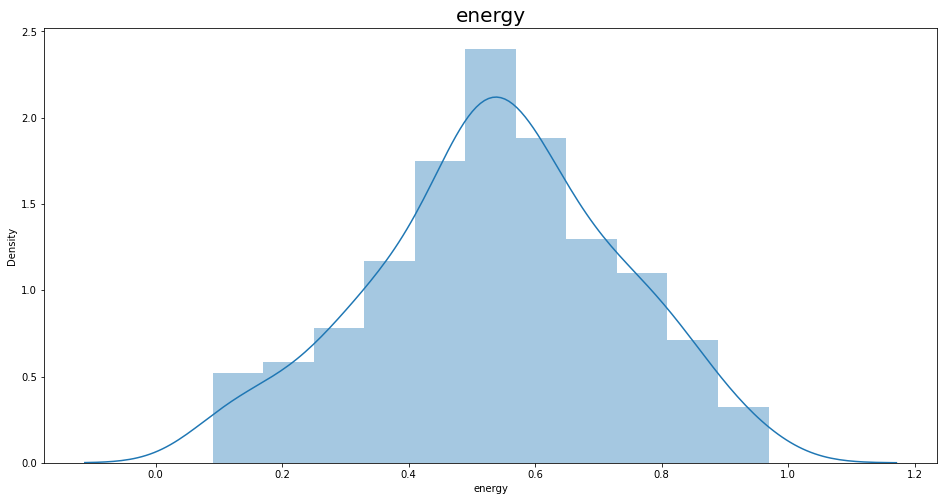

In [ ]:
plt.figure(figsize = (16, 8))                                                                                                           
plt.title('energy',fontsize = 20)                                                                                                                      
sns.distplot(data['energy'])                                                                                                                                      
plt.show()

speechiness graph

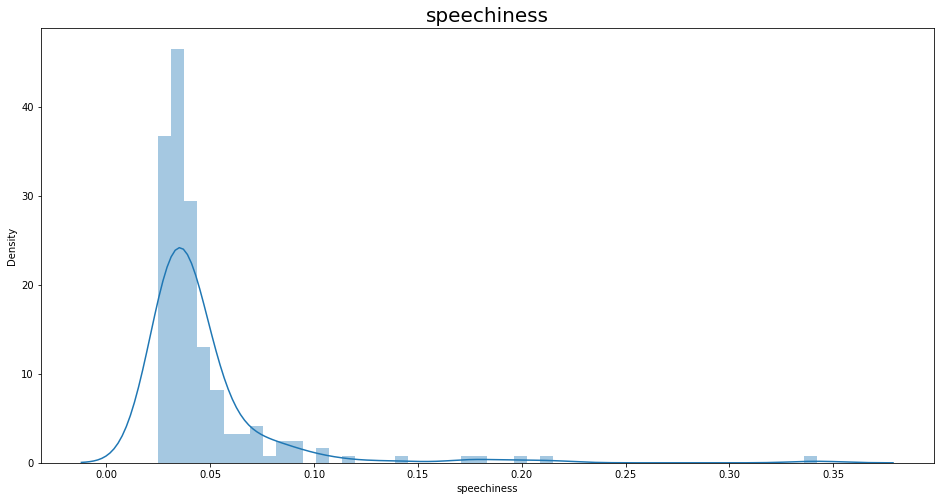

In [ ]:
plt.figure(figsize = (16, 8))                                                                                                           
plt.title('speechiness',fontsize = 20)                                                                                                                      
sns.distplot(data['speechiness'])                                                                                                                                      
plt.show()

acousticness graph

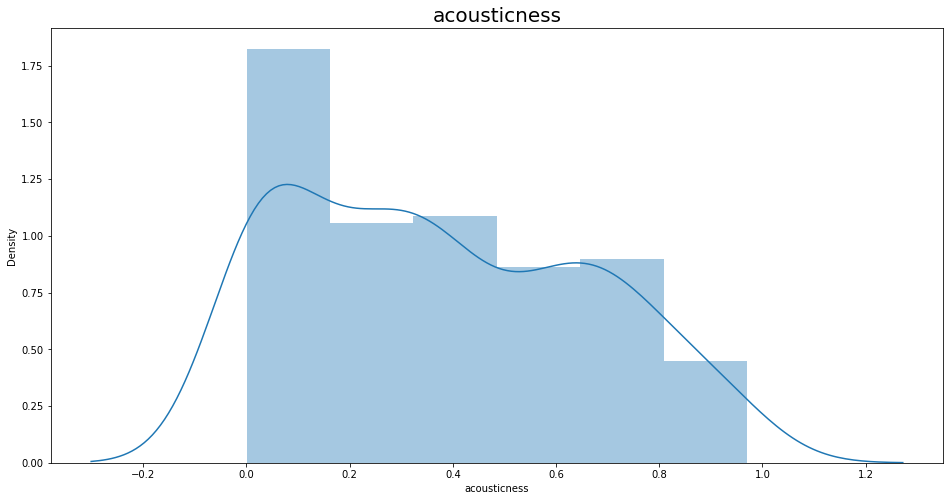

In [ ]:
plt.figure(figsize = (16, 8))                                                                                                           
plt.title('acousticness',fontsize = 20)                                                                                                                      
sns.distplot(data['acousticness'])                                                                                                                                      
plt.show()

liveness graph

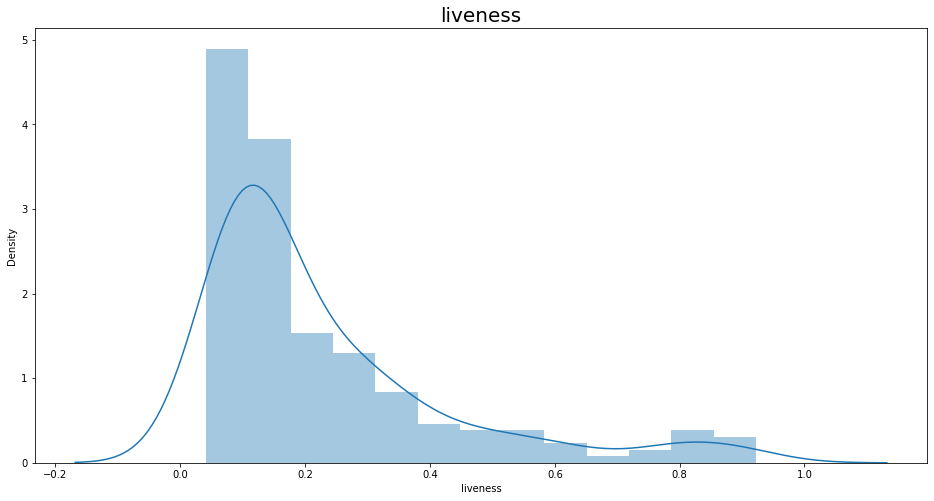

In [ ]:
plt.figure(figsize = (16, 8))                                                                                                           
plt.title('liveness',fontsize = 20)                                                                                                                      
sns.distplot(data['liveness'])                                                                                                                                      
plt.show()

valence graph

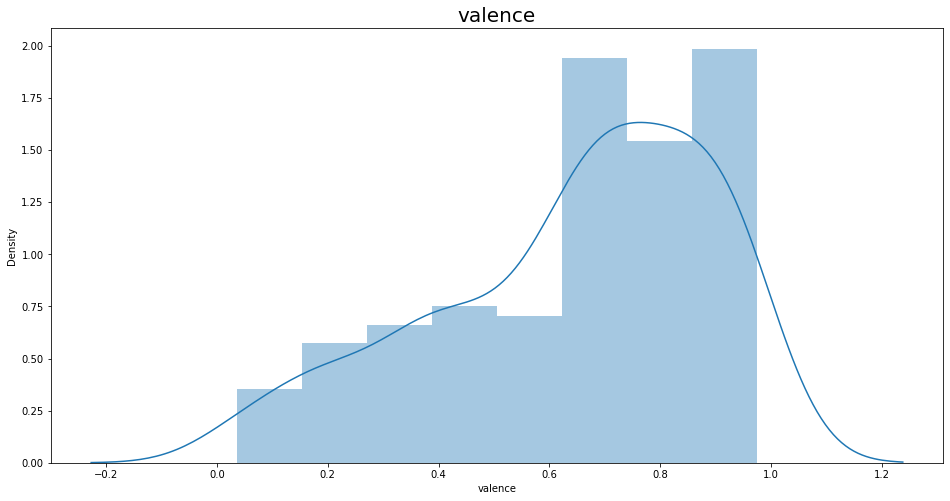

In [ ]:
plt.figure(figsize = (16, 8))                                                                                                           
plt.title('valence',fontsize = 20)                                                                                                                      
sns.distplot(data['valence'])                                                                                                                                      
plt.show()

Count value in column album

In [ ]:
data["album"].value_counts()

The Beatles (white album)                30
Abbey Road                               17
Please Please Me                         14
With The Beatles                         14
Beatles for Sale                         14
Help!                                    14
Rubber Soul                              14
Revolver                                 14
A Hard Day's Night                       13
Sgt. Pepper's Lonely Hearts Club Band    13
Yellow Submarine                         13
Let It Be                                12
Magical Mystery Tour                     11
Name: album, dtype: int64

Drop column ID, year, album, song, duration_ms off

In [ ]:
u = data.copy()
df = data.drop(columns=['id', 'year', 'album','song','duration_ms','ids','cbname'])


In [ ]:
np.matrix(df)

matrix([[0.491 , 0.801 , 0.0361, 0.27  , 0.0665, 0.971 ],
        [0.591 , 0.605 , 0.0413, 0.707 , 0.309 , 0.882 ],
        [0.608 , 0.565 , 0.0336, 0.635 , 0.0601, 0.835 ],
        ...,
        [0.299 , 0.329 , 0.0279, 0.756 , 0.0559, 0.392 ],
        [0.88  , 0.556 , 0.0855, 0.24  , 0.24  , 0.955 ],
        [0.761 , 0.592 , 0.0586, 0.492 , 0.61  , 0.332 ]])

plot graph relation of all column

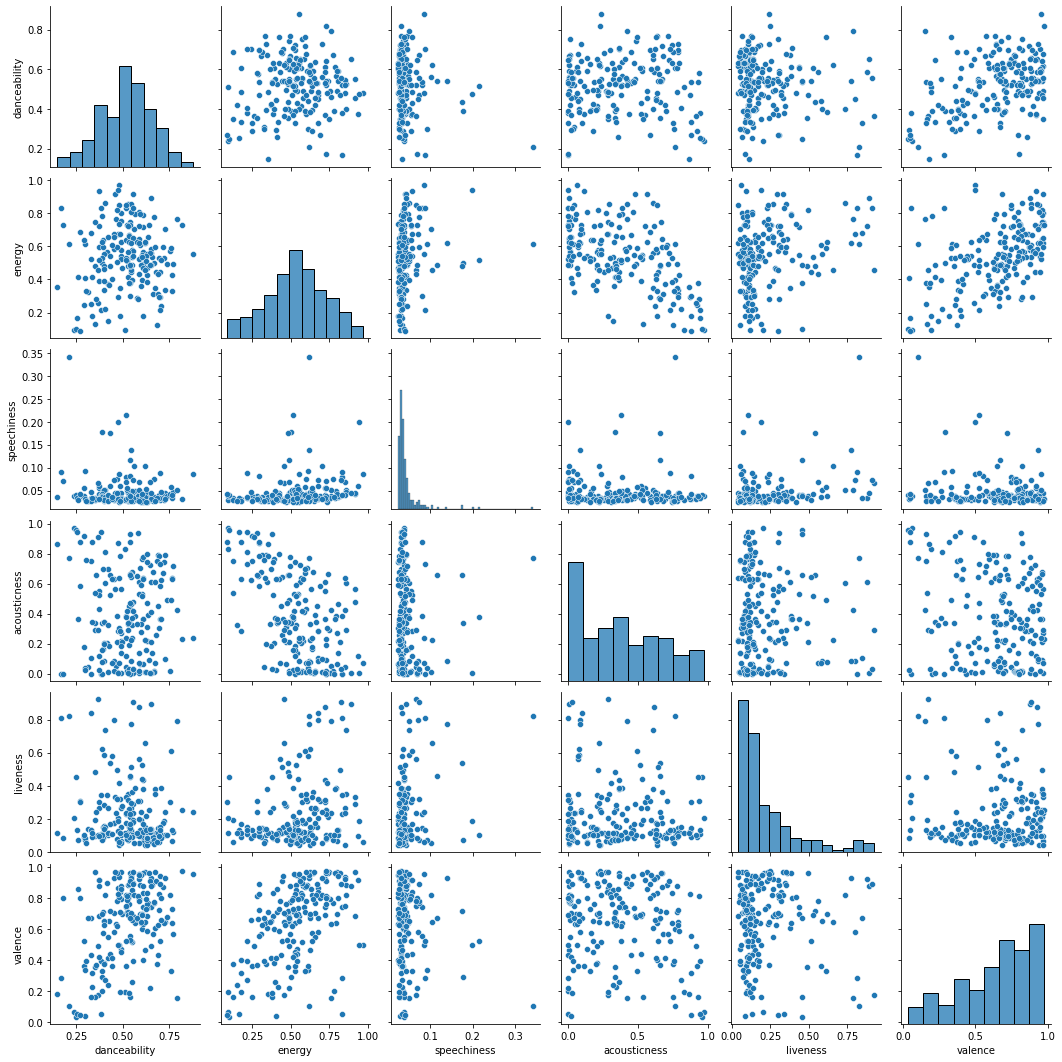

In [ ]:
sns.pairplot(df)

build correlation graph

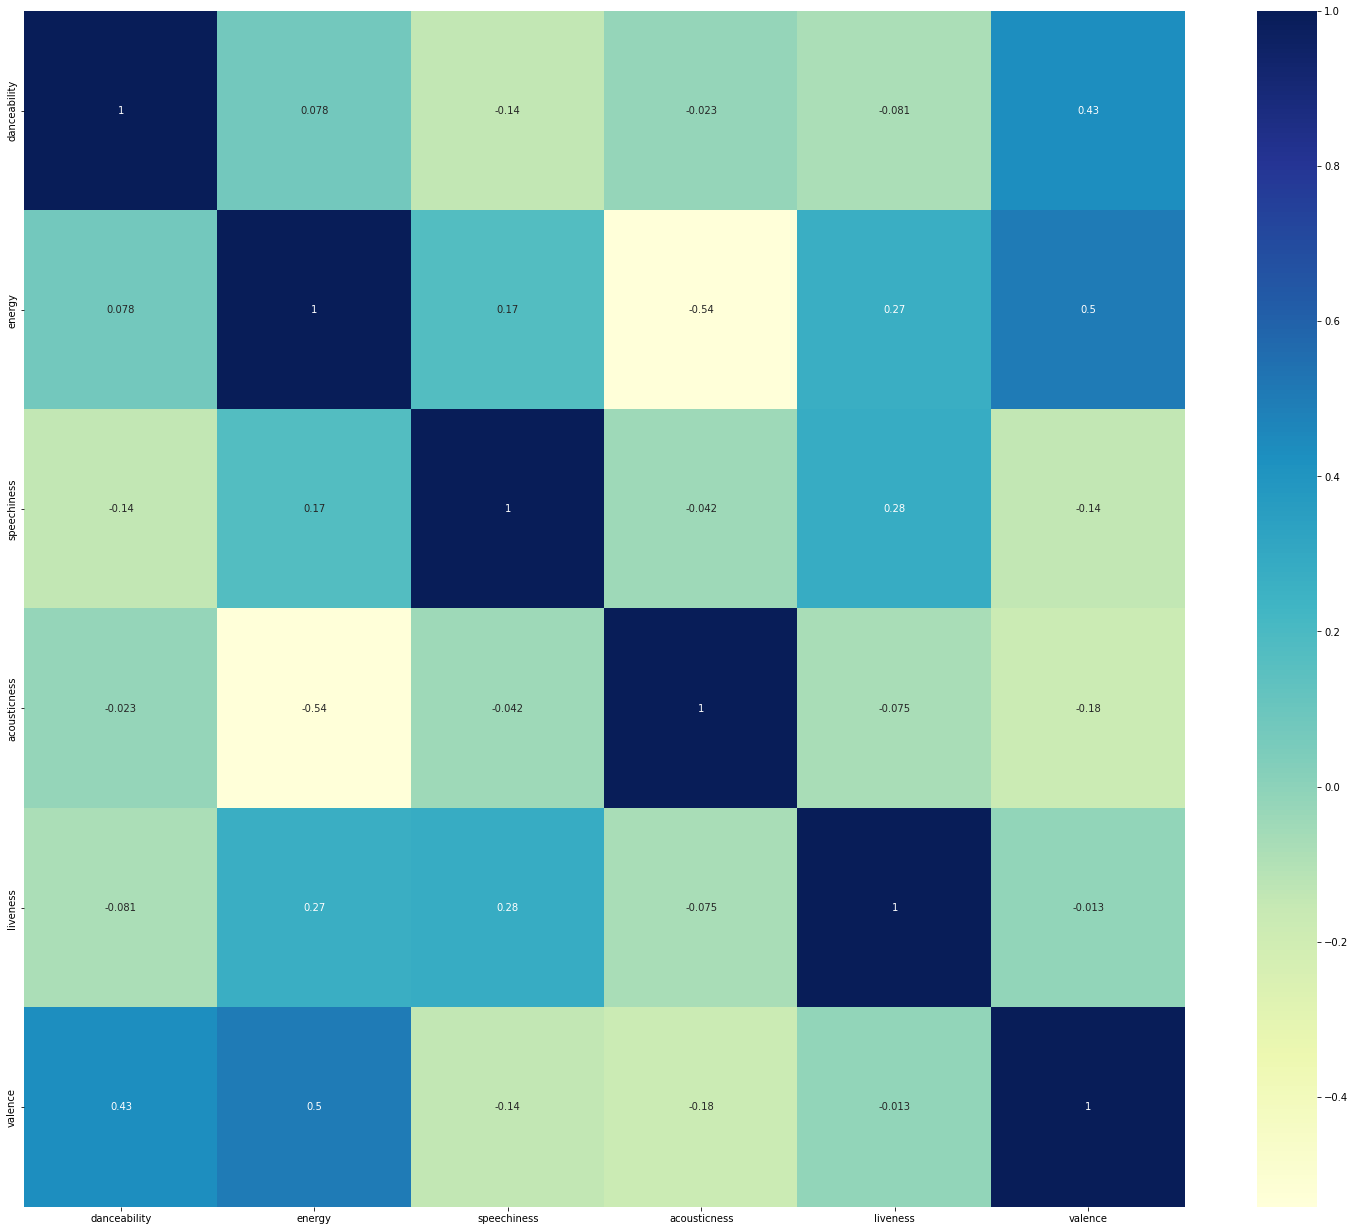

In [ ]:
corr = df.corr()
indx = corr.index
plt.figure(figsize=(26,22))
sns.heatmap(df[indx].corr(),annot=True,cmap="YlGnBu")

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
test_data = u.drop(columns=['id', 'year', 'album','song','duration_ms',])                  

In [ ]:
test_data

,danceability,energy,speechiness,acousticness,liveness,valence,cbname,ids
0,0.491,0.801,0.0361,0.2700,0.0665,0.971,I Saw Her Standing There album : Please Pl...,0
1,0.591,0.605,0.0413,0.7070,0.3090,0.882,Misery album : Please Please Me,1
2,0.608,0.565,0.0336,0.6350,0.0601,0.835,Anna album : Please Please Me,2
3,0.654,0.561,0.0304,0.6080,0.1290,0.929,Chains album : Please Please Me,3
4,0.402,0.860,0.0504,0.6070,0.7360,0.822,Boys album : Please Please Me,4
...,...,...,...,...,...,...,...,...
188,0.440,0.609,0.0358,0.0715,0.5820,0.364,ive got a feeling album : Let It Be,188
189,0.554,0.828,0.0739,0.0307,0.9070,0.888,one after 909 album : Let It Be,189
190,0.299,0.329,0.0279,0.7560,0.0559,0.392,the long and winding road album : Let It Be,190
191,0.880,0.556,0.0855,0.2400,0.2400,0.955,for you blue album : Let It Be,191


In [ ]:
float(test_data['danceability'][0])

0.491

In [ ]:
from numpy.linalg import norm

In [ ]:
def recommend(dcblt, eng, sphn, acct, livn, val):
  test_array = np.array([dcblt, eng, sphn, acct, livn, val])
  score_lst = []
  for i in range(193):
    train_array = np.array([float(test_data['danceability'][i]),float(test_data['energy'][i]),
                           float(test_data['speechiness'][i]),float(test_data['acousticness'][i]),
                           float(test_data['liveness'][i]),float(test_data['valence'][i])])
    cosine = np.dot(test_array,train_array)/(norm(test_array)*norm(train_array))
    score_lst.append(cosine)
  return score_lst
  

In [ ]:
def TFnumber(number):
  if number == 1:
    return int(10)
  if number == 2:
    return int(9)
  if number == 3:
    return int(8)
  if number == 4:
    return int(7)
  if number == 5:
    return int(6)
  if number == 6:
    return int(5)
  if number == 7:
    return int(4)
  if number == 8:
    return int(3)
  if number == 9:
    return int(2)
  if number == 10:
    return int(1)
  

In [ ]:
#@title The Beatles Recomendation

#@markdown This is the beatle recommendation system we can recommend you the beatle song !!!

#@markdown we just need to know some information

#@markdown 1) How would you rate your taste with instrumental song (1 to 10 or tick box below if you dont mind) 
speechiness = 6 #@param {type:"slider",min:1,max:10,step:1}
speechiness = TFnumber(speechiness)
speechiness = float(0.3173 / speechiness)   #0.3173 is max(speechiness) - min(speechiness)
dmspeech = False #@param {type:"boolean"}
if dmspeech == True:
  speechiness = 0.04  #mean(speechiness)

#@markdown 2) How would you rate your taste with danceable song (1 to 10 or tick box below if you dont mind) 
danceability = 7 #@param {type:"slider",min:1,max:10,step:1}
danceability = TFnumber(danceability)
danceability = float(0.734 / danceability)  #0.734 is max(danceability) - min(danceability)
dmdance = False #@param {type:"boolean"}
if dmdance == True:
  danceability = 0.51 #mean(danceability)

#@markdown 3) How would you rate your taste with live record song (1 to 10 or tick box below if you dont mind)
liveness = 5 #@param {type:"slider",min:1,max:10,step:1}
liveness = TFnumber(liveness)
liveness = float(0.88 / liveness) #0.88 is max(liveness) - min(liveness)
dmlive = False #@param {type:"boolean"}
if dmlive == True:
  liveness = 0.22 #mean(liveness)

#@markdown 4)How would you rate your taste with accoustic song (1 to 10 or tick box below if you dont mind)
accousticness = 5 #@param {type:"slider",min:1,max:10,step:1}
accousticness = TFnumber(accousticness)
accousticness = float(0.97 / accousticness) #0.88 is max(accousticness) - min(accousticness)
dmaccousticness = False #@param {type:"boolean"}
if dmaccousticness == True:
  accousticness = 0.37  #mean(accousticness)

#@markdown 5)How would you rate your taste with positive song (1 to 10 or tick box below if you dont mind)
valence = 5 #@param {type:"slider",min:1,max:10,step:1}
valence = TFnumber(valence)
valence = float(0.9393 / valence) #0.9393 is max(valence) - min(valence)
dmvalence = False #@param {type:"boolean"}
if dmvalence == True:
  valence = 0.64  #mean(valence)

#@markdown 6)How would you rate your taste with high energy song (1 to 10 or tick box below if you don1t mind)
energy = 7 #@param {type:"slider",min:1,max:10,step:1}
energy = TFnumber(energy)
energy = float(0.8788 / energy) #0.8788 is max(energy) - min(energy)
dmenergy = False #@param {type:"boolean"}
if dmenergy == True:
  energy = 0.53 #mean(energy)


x = recommend(danceability,energy,speechiness,accousticness,liveness,valence)
y = max(x)
for i in range(len(x)):
  if x[i] == y:
    highest = i
data['cbname'][highest]